## Part 2: Visual Analysis

In this section, I will go over some visualizations of the data and deliver input.

## Initilization

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set() #loads color palette for seaborn
np.random.seed(123) #ensures that random example is consistent every time

spotify = pd.read_csv('/Users/jarek/Spotify project/SpotifyAnalysis.csv')
spotify = spotify[spotify['popularity'] >= 70]
spotify = spotify.drop(spotify.columns[0], axis = 1)
s_sample = spotify.sample(1000)
s_sample.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19706,23T0OX7QOiIUFShSzbJ5Uo,Gabby Barrett,Goldmine,I Hope,74,210772,False,0.466,0.536,6,-6.227,1,0.0429,0.0951,0.000000,0.1140,0.377,75.998,4,country
51021,0a6zRnrjmaOcqsEIFkXIhw,Akhil,Khaab,Khaab,72,201689,False,0.662,0.661,0,-5.689,1,0.0514,0.4170,0.000000,0.0784,0.222,80.009,4,hip-hop
2369,5f2zZawBtGBEw24ABweErz,Bea Miller;Arcane;League of Legends,Playground (from the series Arcane League of L...,Playground (from the series Arcane League of L...,70,230525,False,0.514,0.703,8,-6.859,1,0.0298,0.0107,0.000076,0.1300,0.356,157.399,4,alt-rock
65023,6TQS7URegxmcb8tTNpoXzi,Dhanush;Anirudh Ravichander,"Megham Karukatha (From ""Thiruchitrambalam"")","Megham Karukatha (From ""Thiruchitrambalam"")",80,290400,False,0.429,0.614,4,-6.573,0,0.0709,0.5130,0.000316,0.0922,0.743,149.966,3,k-pop
99022,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",76,228855,False,0.603,0.573,1,-5.843,1,0.0502,0.4780,0.000000,0.0971,0.236,82.941,4,singer-songwriter


This code establishes the libraries necessary to create visualizations, as well as imports the CSV dataset. For my first approach, I opted for a random sample of 1000 songs at or above a popularity score of 70. I also dropped a nameless column that had include itself in the dataset.

## Scatterplot - Histogram Joint Plots for Danceability, Energy, Valence

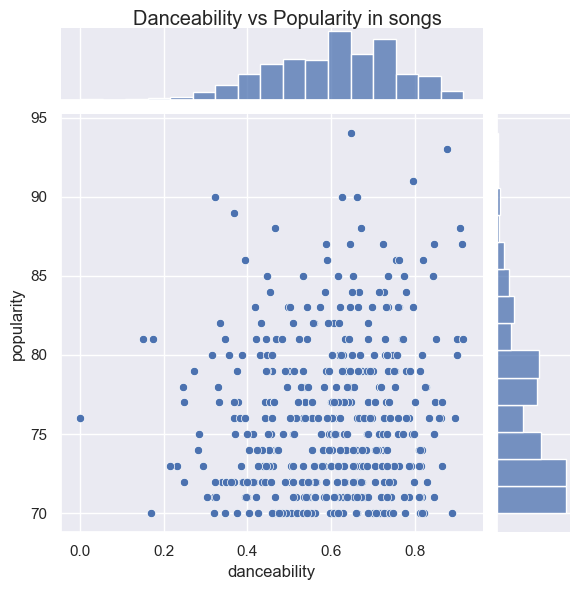

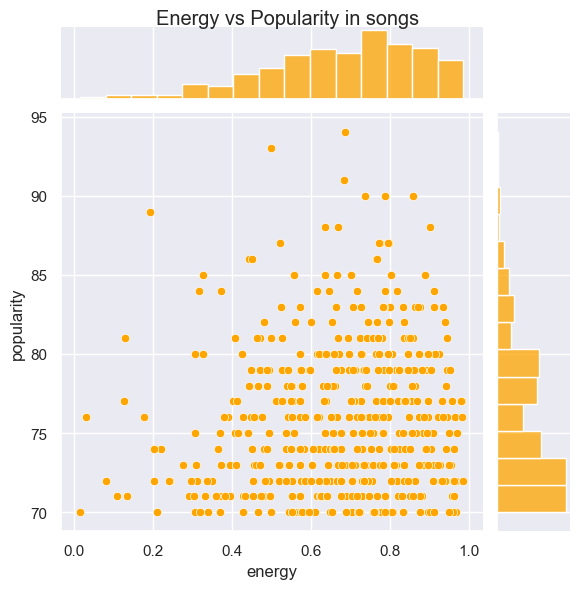

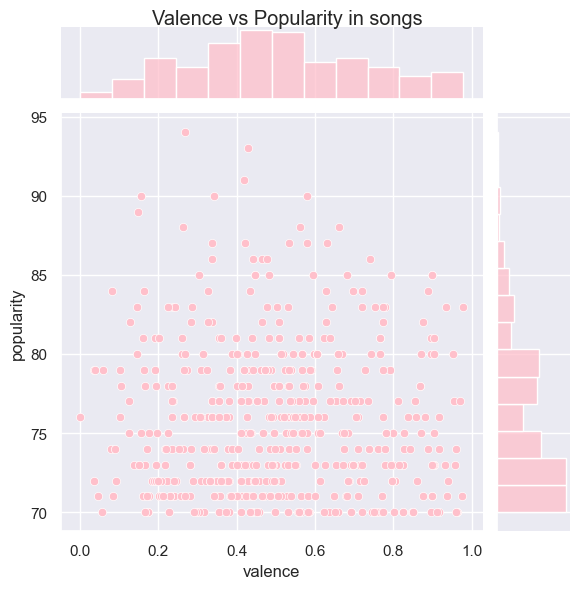

In [61]:
sns.jointplot(data=s_sample, x="danceability", y="popularity", kind='scatter')
plt.suptitle("Danceability vs Popularity in songs")
plt.subplots_adjust(top=0.95)

sns.jointplot(data=s_sample, x="energy", y="popularity", kind='scatter', color='orange')
plt.suptitle("Energy vs Popularity in songs")
plt.subplots_adjust(top=0.95)

sns.jointplot(data=s_sample, x="valence", y="popularity", kind='scatter', color='pink')
plt.suptitle("Valence vs Popularity in songs")
plt.subplots_adjust(top=0.95)

For this visualization, I did a joint scatterplot histogram relating a song's danceability score onto its popularity. Immediately, one can identify the potential normal distribution of danceable songs within the sample peaking in the .6-.7 range. This supports the notion that an essential component of popular songs is above average danceability.

The same just about holds the same for energy, with more favorable songs being above average in energy. It also seemed to show that the mean energy level for 70+ popularity songs is somewhat higher than the mean danceability. This speaks to the fact that a song's energy level is more translatable to popularity than danceability. It is easy to believe this with the most popular genre in the world, pop, being defined as songs that are of high tempo and energy.

Valence, however, seems to not hold any impact when it comes to song popularity, with a seemingly uniform distribution amongst the sample. Because of this, I dropped it from my research process in the proceeding visualizations. 

I was hoping to find a trend within the distribution of popularity, but was disappointed to find that, reasonably, the majority of the songs within the sample laid near the bottom of the range. Because of this, I decided to revise my apporach.

In [52]:
pop_tier_3 = (spotify['popularity'] >= 70) & (spotify['popularity'] < 80)
pop_tier_2 = (spotify['popularity'] >= 80) & (spotify['popularity'] < 90)
pop_tier_1 = (spotify['popularity'] >= 90)

tier_3 = spotify[pop_tier_3]
tier_2 = spotify[pop_tier_2]
tier_1 = spotify[pop_tier_1]

print(len(tier_1),len(tier_2), len(tier_3))

98 1103 4271


In order to account for the organized popularity, I organized the data into tiers of popularity, with tier one being the most popular songs with a 90 or above ranking, tier two being the 80's and tier three being the remaining 70's. In order to maintain comparability, I took a sample of tier 2 and 3 songs akin to the size of tier 1.

In [104]:
tier_2_sample = tier_2.sample(98)
tier_3_sample = tier_3.sample(98)

([<matplotlib.axis.YTick at 0x7f9b4cac24a0>,
 [Text(0, 70, '70'),
  Text(0, 72, '72'),
  Text(0, 74, '74'),
  Text(0, 76, '76'),
  Text(0, 78, '78')])

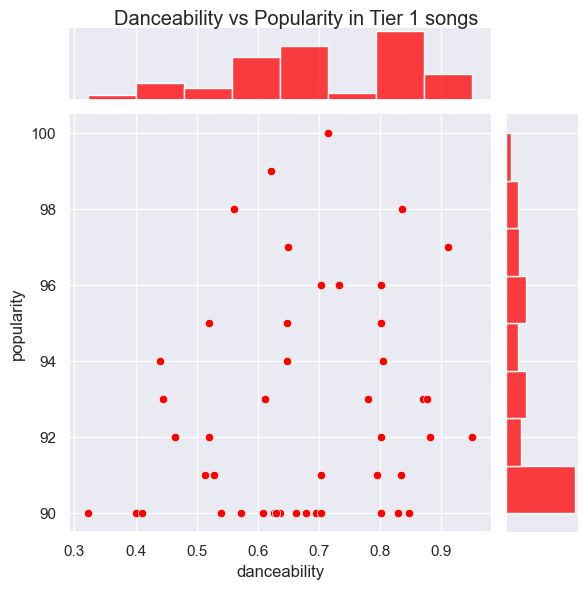

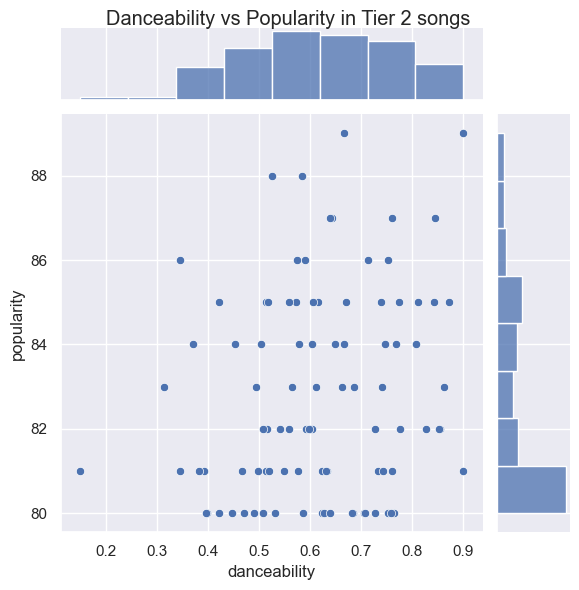

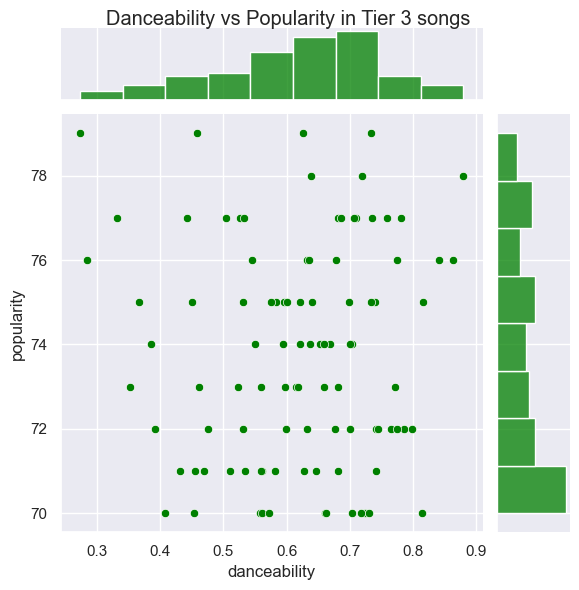

In [105]:
#Tier 1 Danceability Plot code
sns.jointplot(data=tier_1, x="danceability", y="popularity", color='red')
plt.suptitle("Danceability vs Popularity in Tier 1 songs")
plt.subplots_adjust(top=0.95)

#Tier 2 Danceability Plot code
sns.jointplot(data=tier_2_sample, x="danceability", y="popularity", kind='scatter')
plt.suptitle("Danceability vs Popularity in Tier 2 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(80,90,2))

#Tier 3 Danceability Plot code
sns.jointplot(data=tier_3_sample, x="danceability", y="popularity", kind='scatter', color='green')
plt.suptitle("Danceability vs Popularity in Tier 3 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(70,80,2))

For this set of visualizations, I chose to seperate the three into their own graphs because I am most interested in the shape of the data. It appears that for tiers one and two, some sort of linear relationship for sure exists amongst the two factors. For tier three, however, a handful of outliers points the data toward being more uniform than linear. However, this can be rationalized by the sheer range of tier three songs, with it being exponentially greater than any other tier. On the surface, the linear relationship between the two factors appears to be nothing more than common sense; who would listen to music that wasn't danceable in some way? Then, in theory it would hold that the most popular songs would be the most danceable. The seperation of tiers also suggests that danceability is one of they key factors that can bring a song from a 80 to perhaps an 83, 85 or even an 90.

([<matplotlib.axis.YTick at 0x7f9b4d867520>,
 [Text(0, 70, '70'),
  Text(0, 72, '72'),
  Text(0, 74, '74'),
  Text(0, 76, '76'),
  Text(0, 78, '78')])

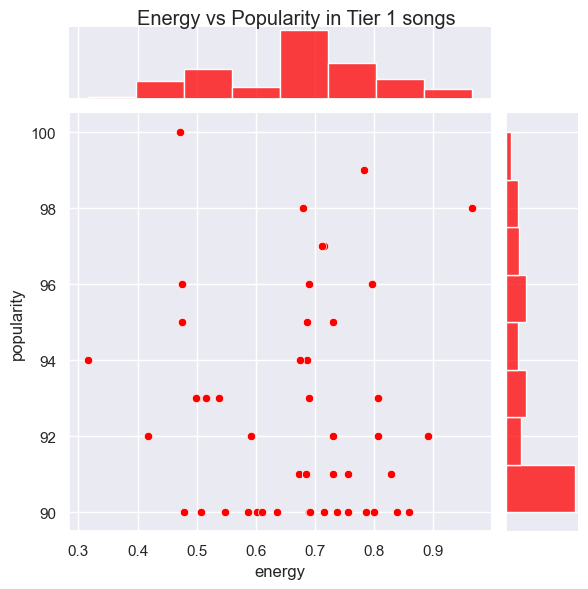

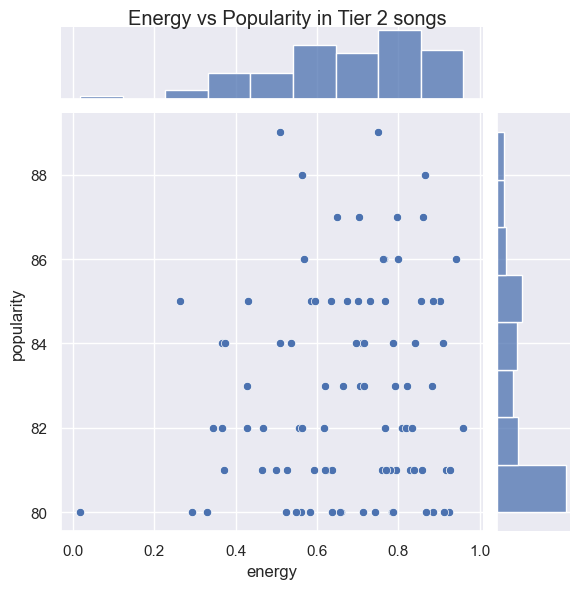

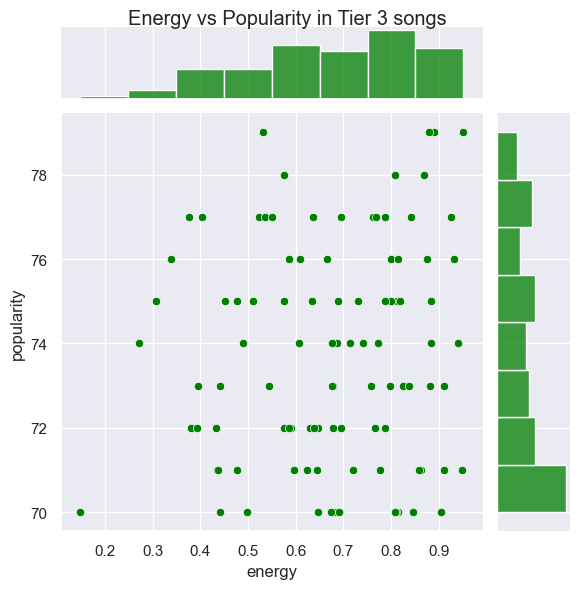

In [106]:
#Tier 1 Energy Plot code
sns.jointplot(data=tier_1, x="energy", y="popularity", color='red')
plt.suptitle("Energy vs Popularity in Tier 1 songs")
plt.subplots_adjust(top=0.95)

#Tier 2 Energy Plot code
sns.jointplot(data=tier_2_sample, x="energy", y="popularity", kind='scatter')
plt.suptitle("Energy vs Popularity in Tier 2 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(80,90,2))

#Tier 3 Energy Plot code
sns.jointplot(data=tier_3_sample, x="energy", y="popularity", kind='scatter', color='green')
plt.suptitle("Energy vs Popularity in Tier 3 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(70,80,2))

The results for energy are less straightforward than for danceability. Firstly, it is clear in all 3 tiers that a linear relationship exists between the two variables. This holds up the idea that popular songs are, on average, higher energy songs. However, the average energy level of a song is consistent only for tier 2 and 3, with tier 1 having a notably low mean in comparison.

This anomaly may be explained by the seasonality of popular music. Acknowledging that this data was compiled in November of 2022, the deep of winter, it would figure that the most popular music would stand to match the characteristics of the seasons, with winter being more so known for slow ballads and staying inside rather than the excitement of the summer sun. Thus, the songs thrusted into the highest eschelon of popularity may be lower energy level than its counterparts, with the lower tiered music representing the general pattern.

## DataFrame Resconstruction

In [82]:
new_sample = pd.concat([tier_1, tier_2_sample, tier_3_sample])

def choose_tier(x: pd.DataFrame) -> int:
    """
    Assigns songs to their appropriate tier
    """
    if x['popularity'] >= 90:
        return 1
    elif x['popularity'] >= 80:
        return 2
    else:
        return 3

new_sample['tier'] = new_sample.apply(lambda x: choose_tier(x), axis=1)
new_sample

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tier
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alt-rock,1
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative,1
15013,3JvKfv6T31zO0ini8iNItO,Tom Odell,Long Way Down (Deluxe),Another Love,93,244360,True,0.445,0.537,4,...,0,0.0400,0.6950,0.000017,0.0944,0.1310,122.769,4,chill,1
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,...,0,0.0427,0.0635,0.000001,0.1050,0.3100,116.992,4,dance,1
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.0130,0.000005,0.2660,0.2380,131.121,4,dance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104801,2mRwodUOATBk5spcUsEidB,Rels B,LA ISLA LP,La Última Canción,73,184748,False,0.793,0.605,1,...,0,0.1190,0.4260,0.000000,0.3340,0.2680,91.068,4,spanish,3
53533,2pPO9YecZimmuVQfIzfV6U,Ofenbach;Lagique,Wasted Love (feat. Lagique),Wasted Love (feat. Lagique),75,139563,False,0.734,0.855,6,...,0,0.1350,0.0821,0.000005,0.0901,0.5400,121.955,4,house,3
20308,0YammaEkYSeo9vQYZ1OwS6,David Guetta;Bebe Rexha;J Balvin,7,Say My Name,73,198946,False,0.703,0.660,10,...,0,0.1230,0.1370,0.000000,0.1920,0.7900,95.031,4,dance,3
71213,0RdUX4WE0fO30VnlUbDVL6,Scorpions,Comeblack,Still Loving You,74,403453,False,0.282,0.605,6,...,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,4,metal,3


After initial analysis, I decided to explore the relationship between tiers further. In order to do so, I decided to combine the samples into a singular DataFrame. I also needed to find a way to differentiate the songs by tier, so I created a new column designating the results. I wanted to combine the data in order to perform a multiple regression plot in which I could easily compare the linearity of the plots. This would give a ballpark idea of how dependent each tier was on the factor in question when it came to determining popularity.

Text(0.5, 1.0, 'Energy vs Popularity Linear Regression for all Tiers')

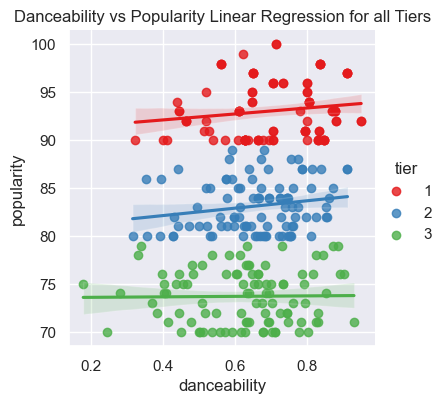

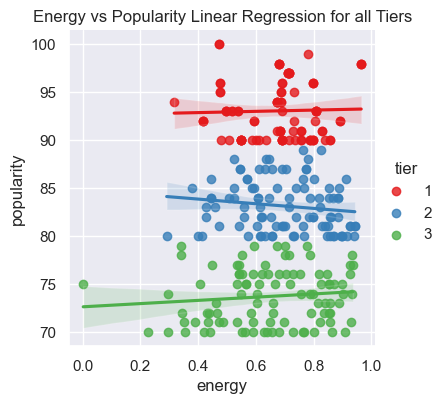

In [107]:
# Danceability Linear Regression
sns.lmplot(
    data=new_sample, x="danceability", y="popularity",
    hue="tier", height=4, palette="Set1"
)
plt.title("Danceability vs Popularity Linear Regression for all Tiers")

# Energy Linear Regression
sns.lmplot(
    data=new_sample, x="energy", y="popularity",
    hue="tier", height=4, palette="Set1"
)
plt.title("Energy vs Popularity Linear Regression for all Tiers")



What stands out as especially shocking is that amongst tier 2 songs, there is a negative correlation between energy and popularity. This goes so far as to reject my previous analysis, as I had asserted previously that it had a positive linear relationship. However, this also happens to further bolster the idea that music is subject to seasons, with less energetic music gaining popularity with the somber weather reflecting the same mood. It pushes me to redo this analysis with a dataset created during the peak of summer, in July or August. I'm willing to guarantee that the linear relationship would be much stronger across the board when it comes to both danceability and energy, as more people are celebrating and having fun. 

Ultimately, what prevails is that there is a higher preference towards livelier music that can be danced to. When taking into considering song recommendations, Spotify can utilize the general pattern in order to jump onto more popular music before others do. The seasonality of music mentioned previously is most definitely something Spotify is well aware of already, so it figures that they would utilize it in order to track down trendy music, as well as create more appropriately tuned playlists that can match the mood of the average listener. While the ultimate key to creating predictive recommendation will always be user-specific data, there are definitely outside trends that Spotify uses in order to appeal to its user base.

## Explicit Music
One other fold that I wanted to explore was the impact of explicity on popular music. I also intend to reapply the filters of danceability and energy between explicit and clean music, as there could be a connection between those as well.

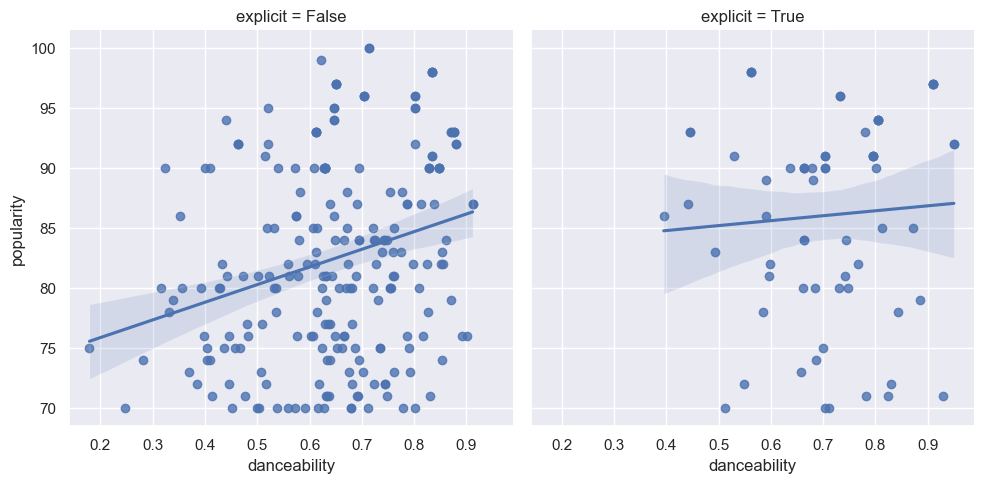

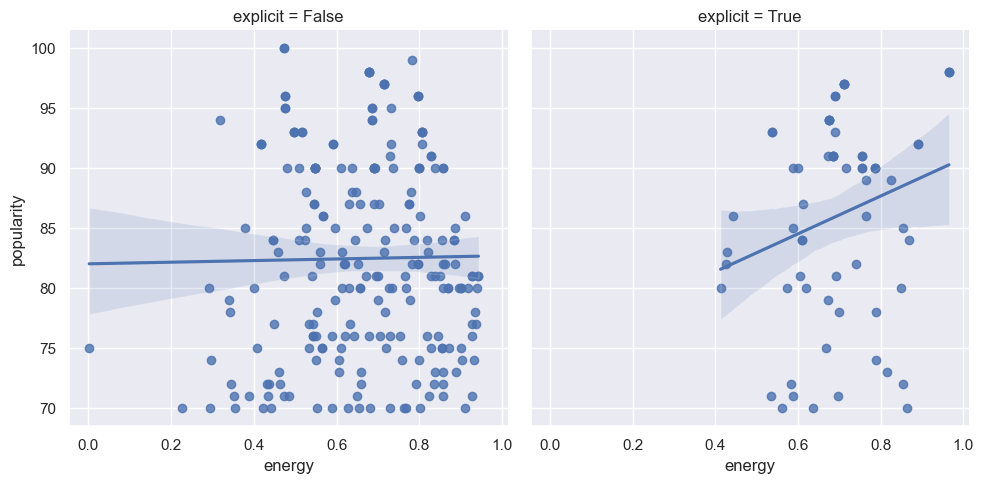

In [103]:
# Danceability Explicit vs Clean
sns.lmplot(
    data=new_sample, x="danceability", y="popularity",
    col="explicit", palette="Set1"
)

# Energy Explicit vs Clean
sns.lmplot(
    data=new_sample, x="energy", y="popularity",
    col="explicit"
)


From the data above, there are two key points to takeaway:

1. Danceability has a stronger linear relationship in clean music
2. Energy has a stronger linear relationship in explicit music

There is reason then to believe that there are methods in which explicit music can be used to gain popularity. The value of explicit words is found in their ability to excite others, and invoke strong emotional feelings of excitement and euphoria. This is akin to how individuals will swear when dominated by sadness, rage or fear. The more a song can capitalize on this effect, it can generate more excitement within a listener and lead to greater popularity as a result.

On the other hand, a lack of explicity can also be used for popularity. As we know, one of the largest listening bases for clean music is young children, whose impression of music is likely solely based on how catchy it is. Therefore, the most important factor in generating a song attuned to the taste of adolescents is the danceability of a song. We can even see firsthand how integral danceability is when it comes to social media, as dance trends cyclically appear on platforms such as TikTok, Instagram and Twitter.

## Conclusion

In this module, we examined the relationship between certain factors of a song's composition and their effects on its popularity. The key takeaway was that, in general, popular music tended to be both more danceable and energetic. However, this pattern can fluctuate somewhat when it comes to the season, as listener's habits tend to reflect moods associated with the weather. Additionally, by looking at explicit music we can identify the nuanced value that either metric can contribute to the popularity of a song. We know that for danceability, clean music can capitalize on it much more than explicit music. This can be explained by clean music's focus on the younger generations, who tend to value trendiness over meaning in music. On the other hand, explicit music is more effective in evoking emotion in others, hence why energy can bring up popularity more effectively for it.